In [105]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [11]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url)
data = pd.read_csv(dataset_url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


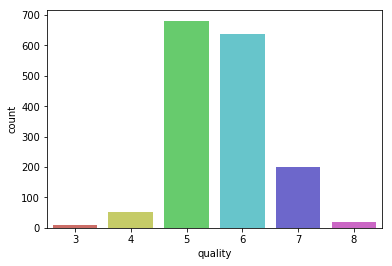

In [28]:
sns.countplot(x='quality', data=data, palette='hls')

In [29]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

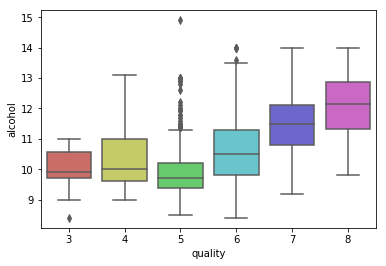

In [32]:
sns.boxplot(x='quality', y='alcohol', data=data, palette='hls')

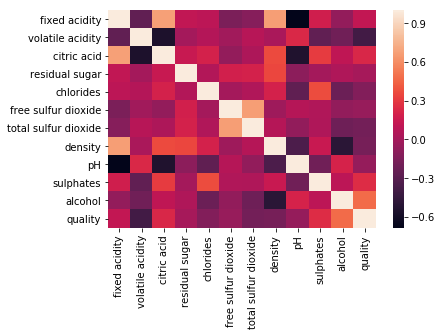

In [12]:
sns.heatmap(data.corr())
plt.show()

In [52]:
X=data[['quality']]
y=data[['alcohol']]

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=25)

In [58]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Create a binary dataset as binary

In [60]:
data['quality'] = data['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 1,
        7 : 1,
        8 : 1         
})

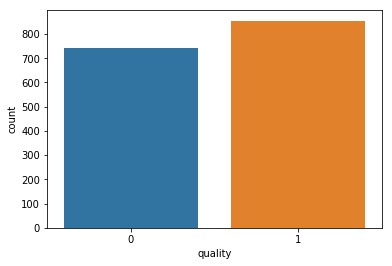

In [61]:
sns.countplot(data['quality'])

In [62]:
y = data['quality']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data,
    y, 
    test_size = 0.1,
    random_state=42
)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

((1439, 12), (1439,))
((160, 12), (160,))


In [86]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
y_perd=logreg.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_perd)
confusion_matrix

array([[72,  0],
       [ 0, 88]])

In [115]:
print(classification_report(Y_test, y_perd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        88

   micro avg       1.00      1.00      1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [116]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_test, Y_test)

1.0

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_perd)
confusion_matrix

array([[72,  0],
       [ 0, 88]])

In [118]:
print(classification_report(Y_test, y_perd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        88

   micro avg       1.00      1.00      1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [119]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(Y_test, y_perd),
    columns=['Predicted Low Quality ', 'Predicted Top Quality'],
    index=['True Low Quality', 'True Top Quality']
)

,Predicted Low Quality,Predicted Top Quality
True Low Quality,72,0
True Top Quality,0,88


In [122]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn.score(X_test,Y_test)

0.76875

In [132]:
svc = SVC()
svc.fit(X_train, Y_train)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_perd))
print(classification_report(Y_test,y_perd))

[[72  0]
 [ 0 88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        88

   micro avg       1.00      1.00      1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

